<a href="https://colab.research.google.com/github/Hongkai040/Tutorials-Homework-Notebooks-1/blob/main/Hongkai_Tutorial_2_intro_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thinking with Deep Learning: Week 1 Part 2
# Introducing Deep Learning

__Instructor:__ James Evans

__Notebook Author:__ Bhargav Srinivasa Desikan

__Teaching Assistants & Course Organizers:__ Likun Cao & Partha Kadambi 

This notebook will demonstrate how to whip up simple shallow and deep neural networks in both Keras and PyTorch, and how these fit into our larger machine learning pipelines. The purpose of this tutorial is to get you up and running in building a simple neural network for classification in Keras and PyTorch, two popular deep learning packages. We will focus on constructing a network, and performing inference using the network. 

### Why Keras AND PyTorch

**Keras** is a high-level package and enables rapid plug & play. It elegantly represents the building blocks of a neural network, so we will lead with it in this section. Developed by an ex-Google engineer, its emphasis is its ability to rapidly prototype neural networks while also being integrated into the second-generation Tensorflow ecosystem (described below). Unlike other packages which might have their own computational engine, Keras runs on top of others, such as Tensorflow, Theano or MXNet. While it shines in its ability deep learning newbies to start right away, it loses points for lack of low-level flexibility.

**PyTorch** offers a lower-level approach with more flexibility, surfacing more controls for the mature user. Because we focus on the representations learned during training, we prefer PyTorch because it gives us customized control over these representations… but for a simple classification task, keras can often do the trick. We will include PyTorch examples of the same network, side-by-side, to introduce its syntax. Developed by Facebook AI, PyTorch has quickly become one of the most used and supported deep learning packages, particularly by the deep learning research community for its ease of debugging and ability to easily conjure up complex models. Deep learning frameworks require a “computational engine” to function, specifically to train deep learning models. PyTorch does this with a dynamic computational graph that uses a “define-by-run” logic, which connects all parts of a neural model in terms of the data objects passed and computations done on them. You’ll see examples of this throughout.

### imports and data

For our examples, we will be using toy, generated data. This helps us in being more precise with what our models are doing. A common machine learning paradigm is classification, where we are given labelled data: an input, and an output class. We will be making such a classification dataset using scikit-learns make dataset functionality.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sklearn.datasets
import sklearn.model_selection

In [3]:
import matplotlib.pyplot as plt


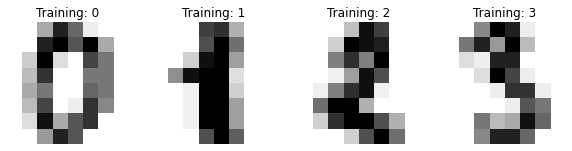

In [4]:
digits = sklearn.datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [5]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # from 3D to 2D

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [7]:
data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [8]:
len(X_train[0])

64

In [9]:
len(data)

1797

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

下面的markdown 都很有问题，code没问题。 数字多分类还是softmax

Here, we generated a dataset of size 100, with 20 fearures, based on a Gaussian process where there are two 'classes'.
Our machine learning algorithm is performing well if it can correctly identify if an input belongs to the class it is labelled as.

For our models to train, it needs to be split into a training and testing dataset.

In [11]:
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

Let us train a simple model and see how well it does on this task. Logistic regression is a popular task for classification.

In [4]:
import sklearn.linear_model

In [13]:
logreg = sklearn.linear_model.LogisticRegression()

In [14]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [15]:
logreg.predict(X_test)

array([8, 6, 4, 8, 0, 8, 9, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 5, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       9, 9, 1, 7, 6, 8, 4, 9, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 1, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [16]:
sklearn.metrics.accuracy_score(y_test, logreg.predict(X_test))

0.9299221357063404

Not terrible, but not exactly a good accuracy score. Let's now turn to neural networks with the hope that added depth can do a better job at approximating the complext function behind the data generation process. We will be using the same dataset.

## Single layer net in Keras

We will start with Keras for building a neural network. [Keras](https://keras.io/) is a very popular choice for building neural networks which have a high level of abstraction. Keras is also tightly integrated with another popular deep learning package, Tensorflow, which is the core of its computational process. One of the big advantages of Keras is how easy it is to start building a model.

In [5]:
## Keras
import keras
import tensorflow as tf
import numpy as np

In [6]:
from keras.layers import Dense

In [7]:
from keras.models import Sequential

Keras makes creating deep learning models really easy. Here is one with only one hidden layer with 20 units, taking an input with 20 features. It uses relu activation for the first layer, which is often used for hidden layers. 

In [20]:
model = Sequential()

In [21]:
model.add(Dense(200, input_dim=64, activation='relu'))

We then use a sigmoid activation for the last layer to make its prediction, because it is a classification problem.

For more activation functions: https://keras.io/api/layers/activations/

In [22]:
model.add(Dense(10, activation='softmax'))

The loss is binary cross entropy which is commonly used for prediction problems, and the ADAM optimiser. 

For more losses:https://keras.io/api/losses/

For more optimisers: https://keras.io/api/optimizers/

In [23]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy(), optimizer="adam")

The compile function configures the model for training, and we fit the model in the next line. The history variable stores information about the training process. 

In [24]:
len(X_train[0])

64

In [25]:
y_train[:10] # not one hot, so we use sparse categorical cross entropy, otherwise categorical cross entropy

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 2s 2ms/step - loss: 2.0274 - sparse_categorical_accuracy: 0.5089
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3082 - sparse_categorical_accuracy: 0.9031
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1646 - sparse_categorical_accuracy: 0.9477
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1114 - sparse_categorical_accuracy: 0.9766
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0884 - sparse_categorical_accuracy: 0.9788
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9833
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9922
Epoch 8/200
29/29 [==============================] - 0s 2ms/step - loss: 0.2331 - sparse_categorical_accuracy: 0.9421
Epoch 9/200
29/29 [==============================] - 0s 2ms/step - l

In [27]:
preds = model.predict(X_test)

In [28]:
preds

array([[5.7966787e-07, 2.5556457e-07, 7.7578710e-07, ..., 1.0715020e-05,
        9.9991775e-01, 6.6905421e-05],
       [4.1570514e-04, 1.5228044e-04, 1.0244237e-06, ..., 1.9492674e-07,
        7.8159440e-01, 2.0338774e-08],
       [4.1748691e-11, 3.7037884e-16, 7.1296410e-21, ..., 1.0722865e-16,
        5.4079027e-17, 5.2298581e-31],
       ...,
       [1.3083284e-11, 1.7963261e-08, 1.1659530e-11, ..., 7.1244795e-14,
        9.9999893e-01, 1.6205392e-14],
       [1.1155455e-07, 1.0863005e-11, 3.0640556e-13, ..., 7.9545170e-09,
        1.2497611e-04, 9.9987483e-01],
       [3.6156018e-09, 1.8303594e-07, 5.2187879e-06, ..., 2.3782056e-11,
        9.9938011e-01, 9.2963113e-08]], dtype=float32)

In [29]:
y_classes = preds.argmax(axis=-1)

In [30]:
sklearn.metrics.accuracy_score(y_test, y_classes)

0.9521690767519466

We see our model performs... just as well. Because we are not dealing with a massive dataset, logistic regression and a single layer neural network perform about just about the same. What should be noted here is how easily we could use Keras to build a single layer neural network.

### Single Layer Net in PyTorch

[PyTorch](https://pytorch.org/) is another widely used deep learning package, and one with high usage in both academia and industry. While Keras slotted in easily as an extension of the machine learning topics we saw yesterday (such as with its use of numpy, and the fit function), PyTorch runs on Tensors. Tensors are essentially a multi-dimensional matrix, and operate similarly to numpy arrays. 

In the following lines of code, we will quickly look at some basic tensor operations, such as generating an empty tensor, basic operations on tensors, and converting between numpy arrays and tensors. While you will not be tested on your ability to manipulate tensors, it is useful to know how to play with them. The final line of code in this section converts our previously used numpy based data to tensors.

In [8]:
## Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

### Tensors and Data

In [32]:
#pytorch tensors calculation
x = torch.empty(5, 3)
print(x)

tensor([[-8.5784e-22,  3.0845e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  3.0845e-41],
        [ 1.1578e+27,  1.1362e+30,  7.1547e+22],
        [ 4.5828e+30,  1.2121e+04,  7.1846e+22],
        [ 9.2198e-39,  7.0374e+22, -2.0352e-22]])


torch.empty() allocates memory space for the array but does not initialize the values in this space--you get whatever uninitialized values are set to those cells in the memory!

In [33]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3504, 0.1794, 0.1367],
        [0.7900, 0.9736, 0.2443],
        [0.8537, 0.7379, 0.0157],
        [0.0187, 0.6270, 0.5323],
        [0.6391, 0.0070, 0.7870]])


torch.rand() produces random values [0,1]

In [34]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [35]:
x.dtype

torch.int64

In [36]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.3986, 0.7478, 0.2860],
        [0.9913, 0.8179, 0.4115],
        [0.2936, 0.1812, 0.3966],
        [0.6741, 0.9353, 0.8399],
        [0.1517, 0.1913, 0.3595]])


In [37]:
print(torch.add(x, y))

tensor([[0.3986, 0.7478, 0.2860],
        [0.9913, 0.8179, 0.4115],
        [0.2936, 0.1812, 0.3966],
        [0.6741, 0.9353, 0.8399],
        [0.1517, 0.1913, 0.3595]])


In [38]:
y.add_(x) # the `_` sign at end means the operation mutates tensor y in-place
print(y)

tensor([[0.3986, 0.7478, 0.2860],
        [0.9913, 0.8179, 0.4115],
        [0.2936, 0.1812, 0.3966],
        [0.6741, 0.9353, 0.8399],
        [0.1517, 0.1913, 0.3595]])


In [39]:
# to_remove solution
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
A = torch.add(a1 @ a2, a3)
print("A =", A)

A = tensor([[20, 24],
        [31, 27]])


In [40]:
a1 @ a2 # dot product

tensor([[10, 14],
        [19, 26]])

In [41]:
# @ and torch.matmul return a multidimensional tensor
b1 = torch.tensor([[3], [5], [7]])
b2 = torch.tensor([[2], [4], [8]])
b = b1.T @ b2
print("b =", b)

b = tensor([[82]])


In [42]:
b1 @ b2.T

tensor([[ 6, 12, 24],
        [10, 20, 40],
        [14, 28, 56]])

In [43]:
# dot function returns a scalar tensor
b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
b = torch.dot(b1, b2)
print("b =", b)

b = tensor(82)


We now look at converting between tensors and numpy arrays.

In [44]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [45]:
torch.ones(5, 3, 1)

tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])

In [46]:
b = a.numpy()
print(type(b))

<class 'numpy.ndarray'>


In [47]:
a.add_(1)
print(a)

tensor([2., 2., 2., 2., 2.])


In [48]:
print(b) # so it's pointer!

[2. 2. 2. 2. 2.]


In [49]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


We now get our training data ready.

In [50]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).type(torch.LongTensor)

### Constructing a Neural Network with PyTorch

PyTorch is a little more involved than Keras. We need to initialise our network with the various parts we will be using. We are using the same parameters as the Keras example. We then define what a forward pass looks like, which is kind of similar to the way we stacked networks in Keras.

[Pytorch's nn module](https://pytorch.org/docs/stable/nn.html) is the basic unit for building neural networks (or computational graphs, as it is sometimes referred to in pytroch). For example, for a hidden layer, we use the Linear layer.

In [9]:
import torch.nn.functional as F

In [52]:
nn.Linear(20, 20)

Linear(in_features=20, out_features=20, bias=True)

The module also includes activation functions.

In [53]:
nn.ReLU()

ReLU()

We usually encapsulate the network by defining the hidden layers and activation functions we will be needing, which you can see in the initialisation. You can then see the forward passes the input tensor through each of the operations.

In [54]:
# one layer
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(64, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 10)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [55]:
net = Network()

In [56]:
net.parameters()

<generator object Module.parameters at 0x7f6eed7a32d0>

We then define the optimiser and loss function.

In [57]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [58]:
criterion = F.nll_loss # negative log likelihood

Unlike Keras where we hit fit and the training happens, we have to define a training epoch, where we set our gradients to zero, run the test data, do a backward pass, and then update the weights. This is actually how a neural network trains, so its useful to see it broken down like this.

In [59]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients, this is the backprop step
    loss.backward()
    # (4) update weights
    opt.step()        
    losses.append(loss.data.numpy())
    return losses

In [10]:
import matplotlib.pyplot as plt

In [61]:
X_train_tensor # this is double

tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  2.,  ..., 14.,  0.,  0.],
        [ 0.,  1., 12.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  3.,  0.,  0.]], dtype=torch.float64)

In [62]:
X_train_tensor.float()

tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  2.,  ..., 14.,  0.,  0.],
        [ 0.,  1., 12.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  3.,  0.,  0.]])

In [63]:
X_train_tensor.int() # compulsory conversion

tensor([[ 0,  0,  5,  ...,  0,  0,  0],
        [ 0,  0,  0,  ..., 10,  0,  0],
        [ 0,  0,  0,  ..., 16,  9,  0],
        ...,
        [ 0,  0,  2,  ..., 14,  0,  0],
        [ 0,  1, 12,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  3,  0,  0]], dtype=torch.int32)

In [64]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


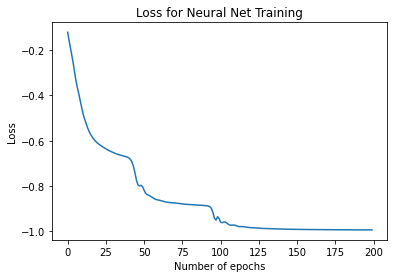

In [65]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

That little loss plot is useful for us to see how our model improves with each epoch. We did 200 epochs like the Keras example. Unlike scikit-learn or Keras objects, we don't have a predict method, but instead pass the test data directly to the net. The little function below that converts the results into a way which we can feed into a metric function.

In [66]:
output = net(torch.tensor(X_test).float())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [67]:
y_classes = output.argmax(axis=-1)

In [68]:
sklearn.metrics.accuracy_score(y_test, y_classes)

0.9421579532814238

Cool! So our PyTorch neural net did a bit better than both Keras and logistic regression. This is a demonstration of how neural networks which are similar in structure can still end up as divergently performing models because of random weights initialisation between different libraries. 

Let us now make our networks deep, and see if that helps!

### Keras Deep Net 

Making a neural net deeper simply means adding more layers or complexity. Lets add an extra layer and increase the number of units and see how it does! In the last example, we added each layer line by line. Here, we use a single list.

For this simple neural network, we use a virtual example based on make_classification function of sklearn package.


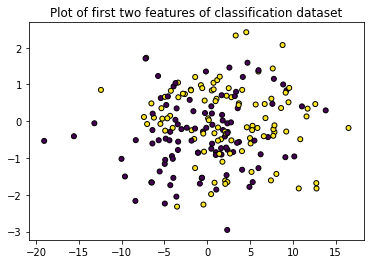

In [67]:
import matplotlib.pyplot as plt

X, y = sklearn.datasets.make_classification(n_samples=200, n_features=200, n_informative=100, n_classes=2, random_state=40)
plt.title("Plot of first two features of classification dataset")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [121]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [214]:
X_train

array([[  3.48189607,  -0.58561223,   0.08129286, ...,  -1.72534345,
          2.26688281,   1.3943934 ],
       [ -4.96716474,  -1.1597204 ,  -1.3439108 , ...,   0.97585577,
          8.28536966,  -0.16134683],
       [  0.56672804,  -0.60999339,  -1.43513287, ...,   0.19431859,
          2.87415563,  -1.1061275 ],
       ...,
       [-12.41723695,   0.85314034,  -0.58905009, ...,  -0.32928775,
          2.88833842,  -0.31324724],
       [ -3.60894799,  -2.04922486,  -0.45575297, ...,  -1.67734063,
          3.51198844,  -0.6966085 ],
       [  4.92567279,  -1.78401112,  -1.24988237, ...,  -0.58782207,
          3.23839069,  -0.48017844]])

In [215]:
model = keras.models.Sequential([keras.layers.Dense(200, input_dim=200, activation='relu'),
                                 keras.layers.Dense(200, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [216]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [217]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1439
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3646
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1128
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0654
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [218]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 200)               40200     
                                                                 
 dense_81 (Dense)            (None, 200)               40200     
                                                                 
 dense_82 (Dense)            (None, 1)                 201       
                                                                 
Total params: 80,601
Trainable params: 80,601
Non-trainable params: 0
_________________________________________________________________


In [244]:
model.predict(X_test)

array([[9.8222673e-01],
       [2.5560045e-01],
       [2.4428101e-01],
       [9.9971539e-01],
       [6.8128854e-02],
       [9.9638212e-01],
       [9.9637944e-01],
       [8.9053148e-01],
       [3.8522705e-01],
       [2.5295734e-02],
       [9.9962199e-01],
       [1.2224664e-02],
       [9.4190396e-02],
       [1.1485481e-02],
       [2.6641819e-01],
       [6.0363525e-01],
       [9.9991286e-01],
       [3.6229083e-04],
       [1.5503139e-02],
       [9.9934059e-01],
       [7.7022016e-02],
       [9.9752790e-01],
       [2.7894035e-03],
       [2.9511306e-02],
       [9.4193655e-01],
       [3.6075510e-04],
       [6.1443359e-05],
       [9.6129411e-01],
       [9.2516756e-01],
       [9.1094428e-01],
       [9.9674004e-01],
       [4.4709054e-04],
       [2.2999126e-02],
       [2.2444955e-01],
       [1.6662448e-04],
       [2.2374143e-04],
       [1.3155912e-01],
       [8.2354110e-01],
       [6.7780739e-01],
       [9.0919995e-01],
       [2.4842715e-01],
       [6.494863

In [219]:
y_predict = np.argmax(model.predict(X_test), axis=1)
sklearn.metrics.accuracy_score(y_test, y_predict)


0.42

In [220]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_predict)
con_matrix

array([[21,  0],
       [29,  0]])

In [232]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

So our deep(er) Keras model does better than the single layer Keras, and matches the PyTorch deep net.

### PyTorch deep net

Very similar to our first example, except we add an extra hidden unit layer for the tensors to go through.

In [233]:
class DeepNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        # notice how we just add another hidden unit layer
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [234]:
net = DeepNetwork()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss() # binary cross entropy

In [235]:
torch.tensor(y_train).type(torch.LongTensor)

tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0])

In [236]:
torch.tensor(y_train).type(torch.LongTensor).unsqueeze(1)[:3]

tensor([[0],
        [0],
        [0]])

In [237]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).type(torch.LongTensor).unsqueeze(1)

In [238]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

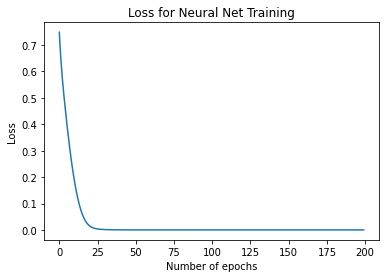

In [239]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [240]:
output = net(torch.tensor(X_test).float())

In [241]:
y_pred = (output.detach().numpy() > 0.5).astype("int32") # threshold = 0.5

In [242]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.72

In [243]:
con_matrix = confusion_matrix(y_test, y_pred)
con_matrix

array([[17,  4],
       [10, 19]])

Adding just one layer improved model accuracies for both our Keras and PyTorch implementations!
Adding depth adds non-linearity and is able to capture more complex relations. Keras and PyTorch have different set ups and formats, and you would want to switch things around as you see fit. 

Let's try and add one more layer, and try out different optimisers and loss functions to see what happens.



In [85]:
class DeeperNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(200, 200)
        # Output layer
        self.output = nn.Linear(200, 1)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        # notice how we just add another hidden unit layer
        x = self.hidden(x)
        x = self.relu(x)
        # adding another layer
        x = self.hidden(x)
        x = self.relu(x)

        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [86]:
net = DeeperNetwork()
opt = optim.Adagrad(net.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
criterion = nn.PoissonNLLLoss() # it's changed!

In [87]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

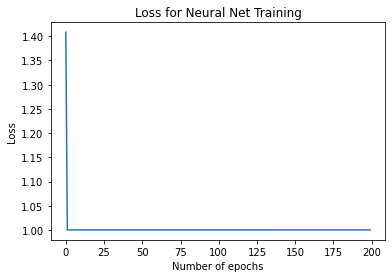

In [88]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [89]:
output = net(torch.tensor(X_test).float())

In [90]:
y_pred = (output.detach().numpy() > 0.5).astype("int32")

In [91]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.42

Uh oh - the loss function is dramatically failing, and our Poisson experiment did not end well. Which makes absolute sense, it isn't one suited for our task at hand. Let's change our loss and see if we fare better.

In [92]:
net = DeeperNetwork()
opt = optim.Adagrad(net.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
criterion = nn.BCELoss()

In [93]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())

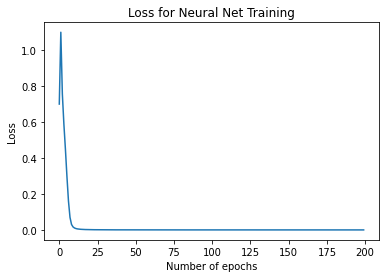

In [94]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [95]:
output = net(torch.tensor(X_test).float())

In [96]:
output

tensor([[1.2026e-04],
        [3.3321e-07],
        [6.9587e-01],
        [4.7322e-01],
        [9.6540e-01],
        [9.9649e-01],
        [4.7637e-06],
        [1.4945e-02],
        [8.9497e-03],
        [4.3064e-01],
        [2.1313e-05],
        [9.9999e-01],
        [3.1525e-05],
        [1.3568e-04],
        [1.0000e+00],
        [1.6840e-04],
        [4.7644e-06],
        [7.7246e-02],
        [6.8304e-01],
        [6.9151e-07],
        [1.0347e-01],
        [1.8367e-01],
        [9.9976e-01],
        [5.6439e-06],
        [9.3796e-01],
        [4.0039e-01],
        [4.2269e-01],
        [9.9828e-01],
        [2.1862e-03],
        [9.9999e-01],
        [5.6922e-04],
        [2.1783e-06],
        [1.5588e-06],
        [9.9984e-01],
        [1.0000e+00],
        [2.5242e-02],
        [6.6048e-05],
        [8.1524e-01],
        [9.7260e-02],
        [9.8825e-01],
        [1.1289e-03],
        [9.2007e-02],
        [9.6216e-01],
        [9.9648e-01],
        [9.9973e-01],
        [9

In [97]:
y_pred = (output.detach().numpy() > 0.5).astype("int32")

In [98]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.58

So the loss is suited for the task, but it seems like the extra layer and Adargrad didn't necessarily do the trick. In your homework, you will experiment similarly with archistecture design and state your results, analysis, and explanations.

###  Interpretability in Neural Networks
Traditionally, neural networks have been taken as "black boxes" good at prediction but not accessible for interpretation. However, in recent years, with the development of AI, people have begun to think about the possibility of interpreting neural networks outcomes for theoretical insight. In this section, we introduce a library--Captum, which aims to interpret the outcomes of feedforward neural networks in terms of input feature importances, layers and neurons that contribute most to the ultimate prediction.

We first install the packages. In this section, we demonstrate two examples. In the first, a deep neural network is trained on data with PyTorch, and Captum is used to understand which of the features were most important and how the network reached its prediction. In the second example, a simple DNN model trained on a sub-sample of a well-known Boston house prices dataset. Captum is used to understand important features, layers / neurons that contribute to the prediction. More details can be found in the official documentations of Captum. 

https://captum.ai/tutorials/

Let's begin!

**Example 1: Titanic survival Classification**

In [397]:
!pip install captum

In [398]:
# Initial imports
import numpy as np

import torch

from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import pandas as pd

Download the dataset from https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.csv and update the cell below with the path to the dataset csv.

In [101]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/data/titanic3.csv"
titanic_data = pd.read_csv(dataset_path)
titanic_data = pd.concat([titanic_data,
                          pd.get_dummies(titanic_data['sex']),
                          pd.get_dummies(titanic_data['embarked'],prefix="embark"),
                          pd.get_dummies(titanic_data['pclass'],prefix="class")], axis=1)
titanic_data["age"] = titanic_data["age"].fillna(titanic_data["age"].mean())
titanic_data["fare"] = titanic_data["fare"].fillna(titanic_data["fare"].mean())
titanic_data = titanic_data.drop(['name','ticket','cabin','boat','body','home.dest','sex','embarked','pclass'], axis=1)

After processing, the features we have are:

Age - Passenger Age

Sibsp - Number of Siblings / Spouses Aboard

Parch - Number of Parents / Children Aboard

Fare - Fare Amount Paid in British Pounds

Female - Binary variable indicating whether passenger is female

Male - Binary variable indicating whether passenger is male

EmbarkC - Binary variable indicating whether passenger 
embarked at Cherbourg

EmbarkQ - Binary variable indicating whether passenger embarked at Queenstown

EmbarkS - Binary variable indicating whether passenger embarked at Southampton

Class1 - Binary variable indicating whether passenger was in first class

Class2 - Binary variable indicating whether passenger was in second class

Class3 - Binary variable indicating whether passenger was in third class

In [102]:
titanic_data.head()

,survived,age,sibsp,parch,fare,female,male,embark_C,embark_Q,embark_S,class_1,class_2,class_3
0,1,29.00,0,0,211.3375,1,0,0,0,1,1,0,0
1,1,0.92,1,2,151.5500,0,1,0,0,1,1,0,0
2,0,2.00,1,2,151.5500,1,0,0,0,1,1,0,0
3,0,30.00,1,2,151.5500,0,1,0,0,1,1,0,0
4,0,25.00,1,2,151.5500,1,0,0,0,1,1,0,0


In [103]:
#We now convert the data to numpy arrays and separate the training and test sets.

np.random.seed(131254)

# Convert features and labels to numpy arrays.
labels = titanic_data["survived"].to_numpy()
titanic_data = titanic_data.drop(['survived'], axis=1)
feature_names = list(titanic_data.columns)
data = titanic_data.to_numpy()

# Separate training and test sets using 
train_indices = np.random.choice(len(labels), int(0.7*len(labels)), replace=False)
test_indices = list(set(range(len(labels))) - set(train_indices))
train_features = data[train_indices]
train_labels = labels[train_indices]
test_features = data[test_indices]
test_labels = labels[test_indices]

Here, the authors of Captum have defined a simple architecture using 2 hidden layers, the first with 12 hidden units and the second with 8 hidden units, each with Sigmoid non-linearity. The final layer performs a softmax operation and has 2 units, corresponding to the outputs of either survived (1) or not survived (0).

In [104]:
import torch
import torch.nn as nn
torch.manual_seed(1)  # Set seed for reproducibility.
class TitanicSimpleNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(12, 12)
        self.sigmoid1 = nn.Sigmoid()
        self.linear2 = nn.Linear(12, 8)
        self.sigmoid2 = nn.Sigmoid()
        self.linear3 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        lin1_out = self.linear1(x)
        sigmoid_out1 = self.sigmoid1(lin1_out)
        sigmoid_out2 = self.sigmoid2(self.linear2(sigmoid_out1))
        return self.softmax(self.linear3(sigmoid_out2))

The pretrained model can be downloaded here: https://github.com/pytorch/captum/blob/master/tutorials/models/titanic_model.pt

In [105]:
net = TitanicSimpleNNModel()
USE_PRETRAINED_MODEL = False

if USE_PRETRAINED_MODEL:
    net.load_state_dict(torch.load('/content/titanic_model.pt'))
    print("Model Loaded!")
else:
    criterion = nn.CrossEntropyLoss()
    num_epochs = 200

    optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
    input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
    label_tensor = torch.from_numpy(train_labels)
    for epoch in range(num_epochs):    
        output = net(input_tensor)
        loss = criterion(output, label_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 20 == 0:
            print ('Epoch {}/{} => Loss: {:.2f}'.format(epoch+1, num_epochs, loss.item()))

    torch.save(net.state_dict(), '/content/drive/MyDrive/Colab Notebooks/titanic_model_trained.pt')

Epoch 1/200 => Loss: 0.70
Epoch 21/200 => Loss: 0.55
Epoch 41/200 => Loss: 0.50
Epoch 61/200 => Loss: 0.49
Epoch 81/200 => Loss: 0.48
Epoch 101/200 => Loss: 0.48
Epoch 121/200 => Loss: 0.48
Epoch 141/200 => Loss: 0.48
Epoch 161/200 => Loss: 0.47
Epoch 181/200 => Loss: 0.47


In [106]:
# model evaluation
out_probs = net(input_tensor).detach().numpy()
out_classes = np.argmax(out_probs, axis=1)
print("Train Accuracy:", sum(out_classes == train_labels) / len(train_labels))

Train Accuracy: 0.8427947598253275


In [107]:
test_input_tensor = torch.from_numpy(test_features).type(torch.FloatTensor)
out_probs = net(test_input_tensor).detach().numpy()
out_classes = np.argmax(out_probs, axis=1)
print("Test Accuracy:", sum(out_classes == test_labels) / len(test_labels))

Test Accuracy: 0.816793893129771


The first question we can ask is which of the features were actually important to the model to reach this decision? This is the first main component of Captum, the ability to obtain **Feature Attributions**. Here we apply Integrated Gradients, one of the Feature Attribution methods included in Captum, which assigns an importance score to each input feature by approximating the integral of gradients of the model’s output with respect to inputs along the straight-line path from given baselines to inputs (see https://arxiv.org/abs/1703.01365).

The method takes tensor(s) of input examples (matching the forward function of the model), and returns the input attributions for the given examples. After we get the attribution for each feature, we can visualize it. 

In [400]:
# ig = IntegratedGradients(net)
# test_input_tensor.requires_grad_()
# attr, delta = ig.attribute(test_input_tensor,target=1, return_convergence_delta=True)
# attr = attr.detach().numpy()

def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
# visualize_importances(feature_names, np.mean(attr, axis=0))

An important thing to note is that the average attributions over the test set don't necessarilly capture all information regarding feature importances. We should also look at the distribution of attributions for each feature. It is possible that features have very different attributions for different examples in the dataset.

For instance, we can visualize the distribution of attributions for sibsp, the number of siblings / spouses.

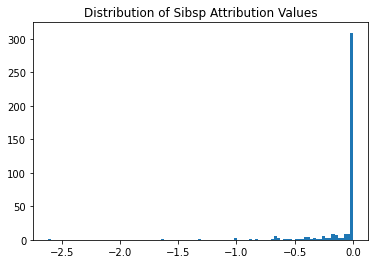

In [109]:
plt.hist(attr[:,1], 100);
plt.title("Distribution of Sibsp Attribution Values");

Now that we have a better understanding of the importance of different input features, another question we can ask regards the function of the neural network and how different neurons in each layer work together to reach the prediction. This leads us to the second type of attributions available in Captum, Layer Attributions. Layer attributions allow us to understand the importance of all the neurons in the output of a particular layer. For this example, we will be using Layer Conductance, one of the Layer Attribution methods in Captum, which computes conductance with respect to a given layer, with returned output in the shape of the layer’s output, showing the total conductance of each hidden layer neuron.

The details of the approach can be found here: https://arxiv.org/abs/1805.12233 https://arxiv.org/pdf/1807.09946.pdf

LayerConductance also requires a target index for networks with mutliple outputs, defining the index of the output for which gradients are computed. Similar to feature attributions, we provide target = 1, corresponding to survival. 

Average Neuron Importances
0 :  0.005
1 :  -0.188
2 :  0.035
3 :  0.013
4 :  0.067
5 :  -0.051
6 :  0.025
7 :  0.000
8 :  -0.333
9 :  -0.000
10 :  -0.272
11 :  0.016


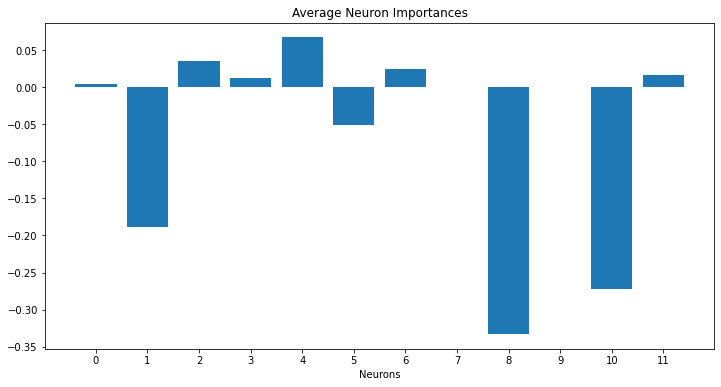

In [110]:
cond = LayerConductance(net, net.sigmoid1)

cond_vals = cond.attribute(test_input_tensor,target=1)
cond_vals = cond_vals.detach().numpy()

# first layer has 12 neurons
visualize_importances(range(12),np.mean(cond_vals, axis=0),title="Average Neuron Importances", axis_title="Neurons")

We can also look at the distribution of each neuron's attributions. Below we look at the distributions for neurons 7 and 9, and we can confirm that their attribution distributions are very close to 0, suggesting they are not learning substantial features.

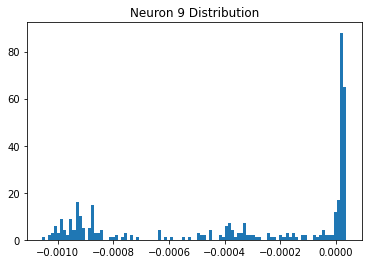

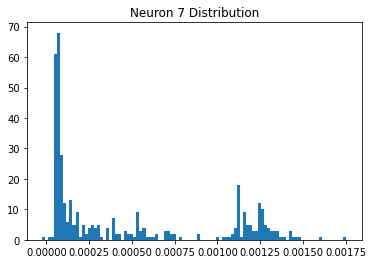

In [111]:
plt.hist(cond_vals[:,9], 100);
plt.title("Neuron 9 Distribution")
plt.figure()
plt.hist(cond_vals[:,7], 100);
plt.title("Neuron 7 Distribution");

The third type of attributions available in Captum, Neuron Attributions.  This allows us to understand what parts of the input contribute to activating a particular input neuron and so suggest the nature of the most used variable interactions in the best performing model. 

Average Feature Importances for Neuron 0
age :  0.003
sibsp :  0.000
parch :  0.000
fare :  0.002
female :  0.000
male :  -0.000
embark_C :  0.000
embark_Q :  0.000
embark_S :  0.000
class_1 :  0.000
class_2 :  0.000
class_3 :  0.000


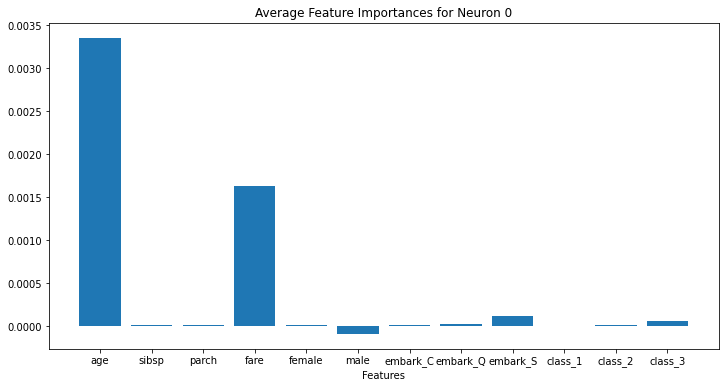

In [112]:
neuron_cond = NeuronConductance(net, net.sigmoid1)
neuron_cond_vals_0 = neuron_cond.attribute(test_input_tensor, neuron_selector=0, target=1)

visualize_importances(feature_names, neuron_cond_vals_0.mean(dim=0).detach().numpy(), title="Average Feature Importances for Neuron 0")

From the data above, it appears that the primary input features used by neuron 0 are age and fare, with limited importance for all other features.

**Example 2: Boston House Prices Prediction (Regression)**

The Captum library can also be applied on regression models to understand important features. Here, a simple DNN model is trained on a sub-sample of a well-known Boston house prices dataset, and we try to use package to interpret it.

In [12]:
import numpy as np

from os import path


import matplotlib.pyplot as plt

#scikit-learn related imports
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# pytorch relates imports
import torch
import torch.nn as nn
import torch.optim as optim

# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

In [114]:
# Data Preparation

boston = load_boston()

# feature_names -> ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_names = boston.feature_names

X = boston.data
y = boston.target

torch.manual_seed(1234)
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

First, we can explore the data and visualize dependent variable vs. each independent variable in separate plots.

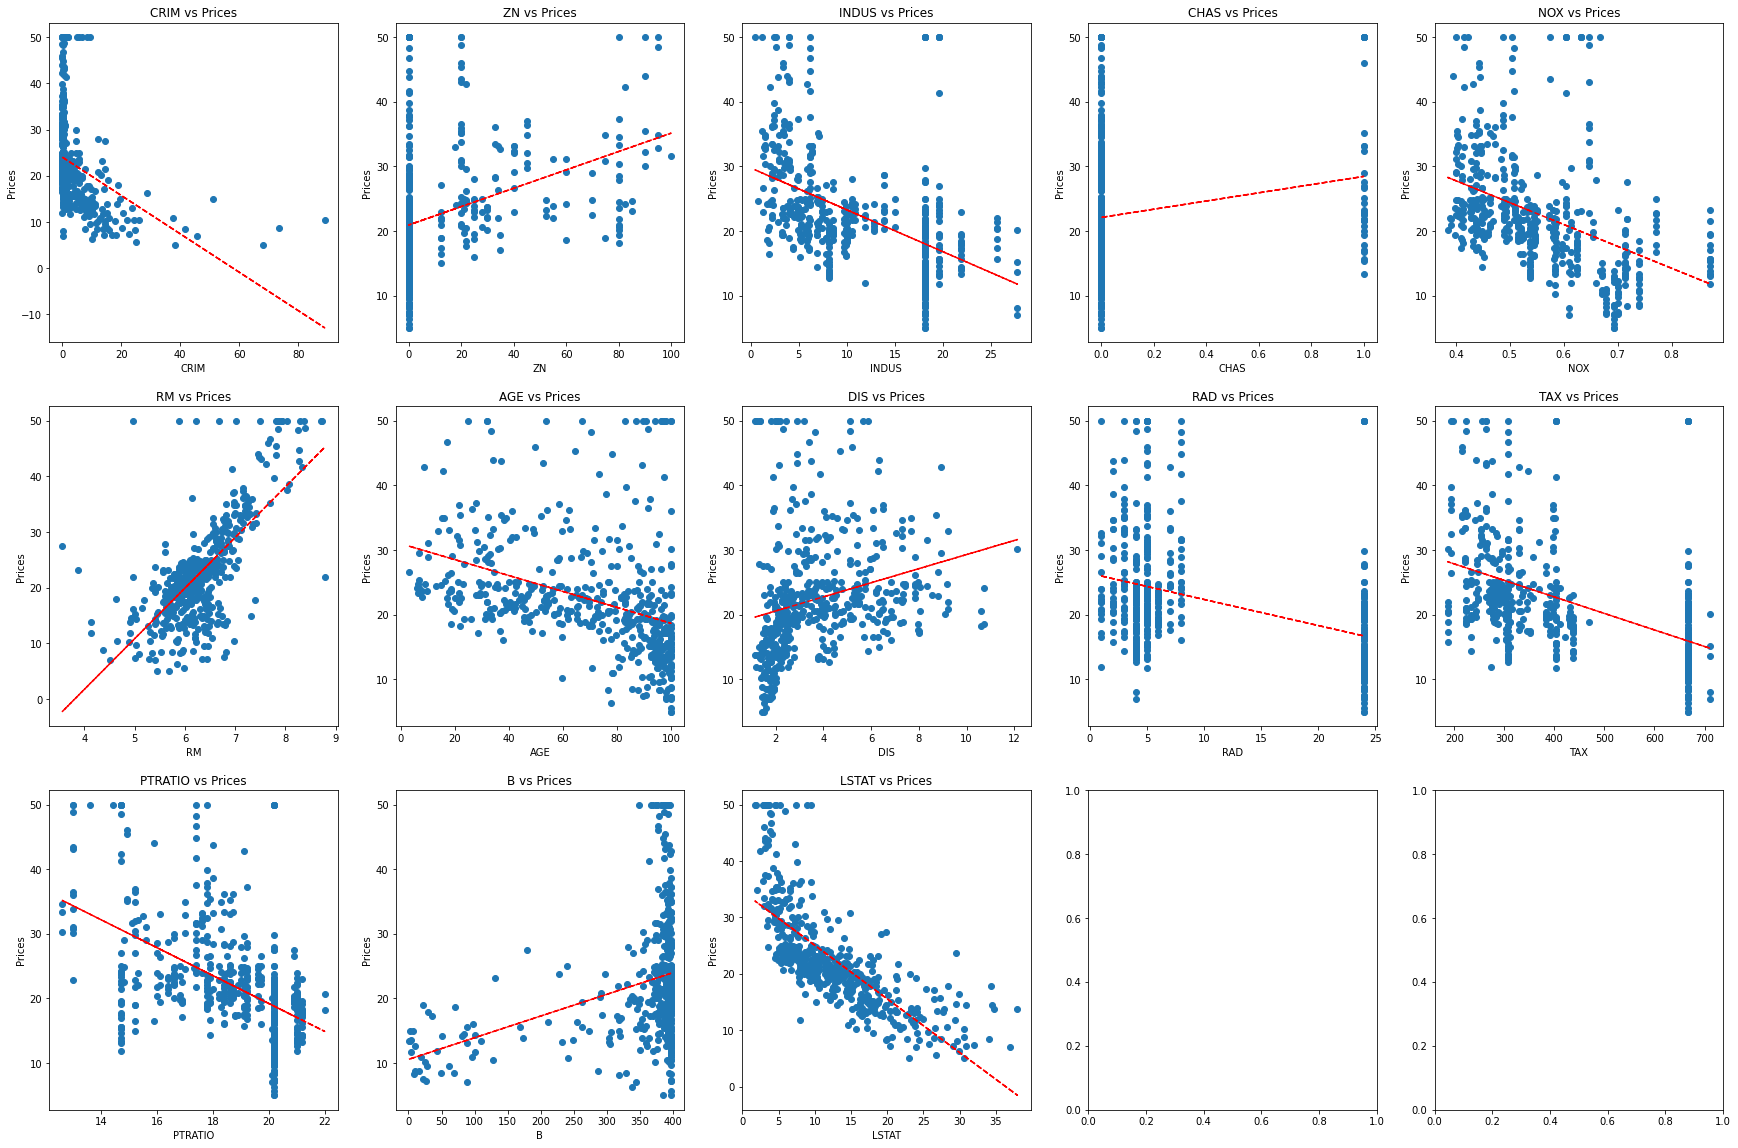

In [115]:
fig, axs = plt.subplots(nrows = 3, ncols=5, figsize=(30, 20))
for i, (ax, col) in enumerate(zip(axs.flat, feature_names)):
    x = X[:,i]
    pf = np.polyfit(x, y, 1)
    p = np.poly1d(pf)

    ax.plot(x, y, 'o')
    ax.plot(x, p(x),"r--")

    ax.set_title(col + ' vs Prices')
    ax.set_xlabel(col)
    ax.set_ylabel('Prices')

Then, we train a neural network and try to interpret the results.

If you have run all the code in this notebook, you should be able to understand each line of code in the following block.

In [116]:
# Model setting and training

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).view(-1, 1).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

batch_size = 50
num_epochs = 200
learning_rate = 0.0001
size_hidden1 = 100
size_hidden2 = 50
size_hidden3 = 10
size_hidden4 = 1

class BostonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(13, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_hidden4)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))

model = BostonModel()
model.train()

criterion = nn.MSELoss(reduction='sum')

def train(model_inp, num_epochs = num_epochs):
    optimizer = torch.optim.RMSprop(model_inp.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        if epoch % 20 == 0:    
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

model_path='/content/drive/MyDrive/Colab Notebooks/boston_model.pt'
train(model)
print('Finished training the model. Saving the model to the path: {}'.format(model_path))
torch.save(model.state_dict(), model_path)

Epoch [1]/[200] running accumulative loss across all batches: 53562.252
Epoch [21]/[200] running accumulative loss across all batches: 19221.868
Epoch [41]/[200] running accumulative loss across all batches: 18055.469
Epoch [61]/[200] running accumulative loss across all batches: 16208.737
Epoch [81]/[200] running accumulative loss across all batches: 14538.289
Epoch [101]/[200] running accumulative loss across all batches: 12580.051
Epoch [121]/[200] running accumulative loss across all batches: 11062.757
Epoch [141]/[200] running accumulative loss across all batches: 10054.818
Epoch [161]/[200] running accumulative loss across all batches: 9377.320
Epoch [181]/[200] running accumulative loss across all batches: 8883.170
Finished training the model. Saving the model to the path: /content/drive/MyDrive/Colab Notebooks/boston_model.pt


In [117]:
# model evaluation
model.eval()
outputs = model(X_test)
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test.detach().numpy()))

print('model err: ', err)

model err:  5.4122243


Let's compute the attributions with respect to the inputs of the model using different attribution algorithms from core Captum library and visualize them. We use test dataset defined in the cells above for this purpose. For GradientSHAP specifically we use the entire training dataset as the distribution of baselines.

SHAP is short for SHapley Additive exPlanations, first described by Lundberg and Lee in 2017 (here is the original paper: https://arxiv.org/abs/1705.07874) a method to reverse-engineer the output of any predictive algorithm. GradientShap approximates SHAP values by computing the expectations of gradients by randomly sampling from the distribution of baselines/references. It adds white noise to each input sample, selects a random baseline from baselines’ distribution and a random point along the path between the baseline and the input, and computes the gradient of outputs with respect to those selected random points. The final SHAP values represent the expected values of gradients * (inputs - baselines). GradientShap makes an assumption that the input features are independent and that the explanation model is linear, meaning that the explanations are modeled through the additive composition of feature effects. Under those assumptions, SHAP value can be approximated as the expectation of gradients computed for randomly generated input samples after adding gaussian noise to each input for different baselines/references.

The execution of the cell below takes half a minute.

In [118]:
ig = IntegratedGradients(model)
ig_nt = NoiseTunnel(ig)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

ig_attr_test = ig.attribute(X_test, n_steps=50)
ig_nt_attr_test = ig_nt.attribute(X_test)
dl_attr_test = dl.attribute(X_test)
gs_attr_test = gs.attribute(X_test, X_train)
fa_attr_test = fa.attribute(X_test)

/usr/local/lib/python3.7/dist-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.7/dist-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""


In the next block, we visualize attribution scores with respect to inputs (using test dataset) for our simple model in one plot. This will help us to understand how similar or different the attribution scores assigned from different attribution algorithms are. 

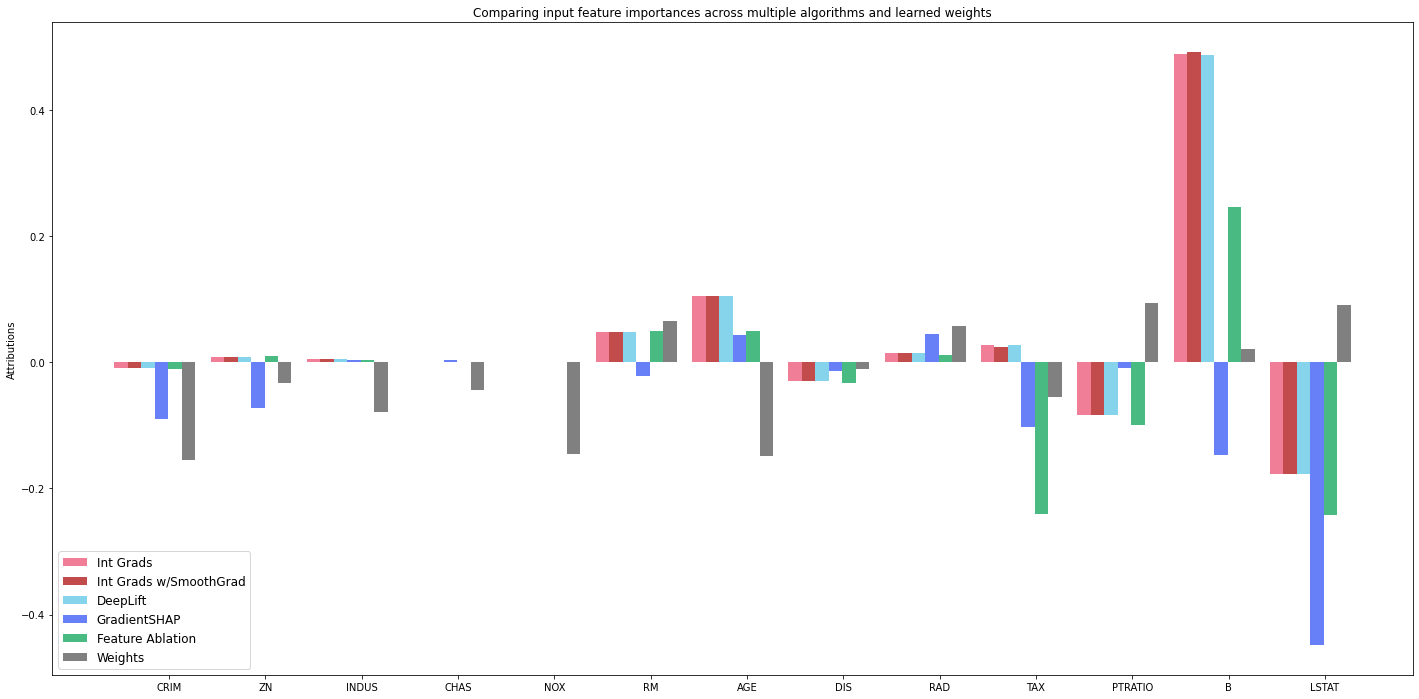

In [119]:
# prepare attributions for visualization

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ig_nt_attr_test_sum = ig_nt_attr_test.detach().numpy().sum(0)
ig_nt_attr_test_norm_sum = ig_nt_attr_test_sum / np.linalg.norm(ig_nt_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

lin_weight = model.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_nt_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

The magnitudes of learned model weights tell us about the correlations between the dependent variable Price and each independent variable. Zero weight means no correlation, whereas positive weights indicate positive correlations and negatives the opposite. 

Attribution algorithms sometimes disagree on assigning importance scores and that they are not always aligned with weights. However, the top important three features: LSTAT, RM and PTRATIO are considered to be important based on both most attribution algorithms and weight scores.

Captum also allows us to attribute to the layers of the model and understand which neurons appear to be more important. In the cell below, we will attribute to the inputs of the fourth hidden layer of our model. Similar to the previous case, the attribution is performed on the test dataset. 

In [120]:
# Compute the attributions of the output with respect to the inputs of the fourth linear layer
lc = LayerConductance(model, model.lin4)
lc_attr_test = lc.attribute(X_test, n_steps=100, attribute_to_layer_input=True)
print(lc_attr_test)
# shape: test_examples x size_hidden
lc_attr_test = lc_attr_test[0]

# weights from forth linear layer
# shape: size_hidden4 x size_hidden3
lin4_weight = model.lin4.weight

tensor([[ 0.0000,  8.7857,  0.0000,  ..., 10.4492, -2.8214,  0.0140],
        [ 0.0000,  9.0360,  0.0000,  ..., 13.4823, -4.5549,  0.0138],
        [ 0.0000, 11.2166,  0.0000,  ..., 10.8395, -2.1874,  0.0140],
        ...,
        [ 0.0000,  1.7936,  0.0000,  ...,  8.0782, -6.8711,  0.0138],
        [ 0.0000, 12.6640,  0.0000,  ..., 12.2631, -1.7348,  0.0140],
        [ 0.0000, 12.6480,  0.0000,  ..., 11.5994, -0.9985,  0.0141]],
       grad_fn=<SumBackward1>)


In the cell below we normalize and visualize attributions and learned model weights for all 10 neurons in the fourth hidden layer. 

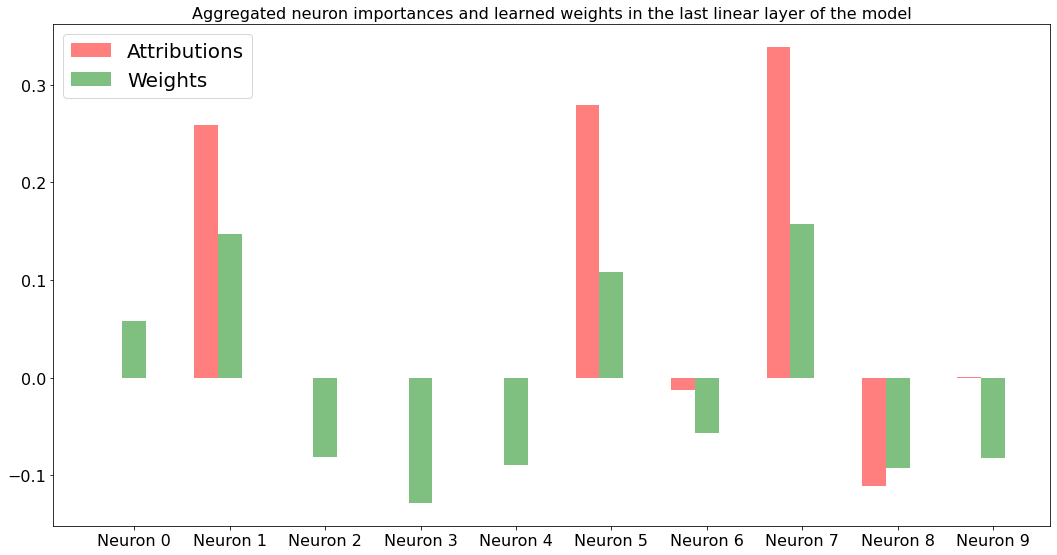

In [121]:
plt.figure(figsize=(15, 8))

lc = LayerConductance(model, model.lin4)# here
lc_attr_test = lc.attribute(X_test, n_steps=100, attribute_to_layer_input=True)

x_axis_data = np.arange(lc_attr_test.shape[1])

y_axis_lc_attr_test = lc_attr_test.mean(0).detach().numpy()
y_axis_lc_attr_test = y_axis_lc_attr_test / np.linalg.norm(y_axis_lc_attr_test, ord=1)

y_axis_lin4_weight = lin4_weight[0].detach().numpy()
y_axis_lin4_weight = y_axis_lin4_weight / np.linalg.norm(y_axis_lin4_weight, ord=1)

width = 0.25
legends = ['Attributions','Weights']
x_axis_labels = [ 'Neuron {}'.format(i) for i in range(len(y_axis_lin4_weight))]

ax = plt.subplot()
ax.set_title('Aggregated neuron importances and learned weights in the last linear layer of the model')

ax.bar(x_axis_data + width, y_axis_lc_attr_test, width, align='center', alpha=0.5, color='red')
ax.bar(x_axis_data + 2 * width, y_axis_lin4_weight, width, align='center', alpha=0.5, color='green') # here
plt.legend(legends, loc=2, prop={'size': 20})
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_labels)

plt.show()

It is interesting to observe that the weights and attribution scores are well aligned for all 10 neurons in the last layer. Meaning that the neurons with negative weights also have negative attribution scores and we can observe the same for the positive weights and attributions.

## <span style="color:red">*Homework Exercise*</span>

<span style="color:red"> Similar to tutorial 1.1, your task here is to use the deep learning models we experimented with on synthetic data but instead using a real world dataset. 

Immediately below each of the following prompts, add Colab cells that:

**1)** Find and load a dataset (with more than 500 data points) into both Keras and PyTorch formats, either (a) related to your research or thesis, (b) curated from a popular data repository, or (c) associated with one of the class projects that students will undertake, which explores a social scientific area of your interest  (e.g., the dataset you used for homework 1.1). [kaggle.com](https://www.kaggle.com/datasets) is a popular website for machine learning related datasets, and you can find a good resource for social science datasets [here](https://guides.emich.edu/data/free-data).

My anticipated final project is sentiment analysis of movie comments and graph analysis of movie scripts. I'd use BERT for classification of sentiment of comments. So here I use movie comments to play with toy keras and PyTorch models. For better performance, I use pre-trained bert-base-chinese model to vectorize movie comments :)

In [13]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertModel, TrainingArguments, Trainer, pipeline
!pip install datasets
from datasets import load_metric, load_dataset

from tqdm import tqdm
from collections import Counter

In [14]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [15]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
model =BertModel.from_pretrained("bert-base-chinese", num_labels=2)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [249]:
comments = pd.read_csv('/content/drive/MyDrive/Dataset/moviedata_small/comments.csv')
comments = comments.loc[:, ['comment_time','douban_id', 'rating', 'content']]
comments.head()

,comment_time,douban_id,rating,content
0,2018-09-05 19:42:07,5113101,2.0,480p，画质不高，黑白，y
1,2019-07-09 14:52:07,5113101,1.0,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.
2,2010-11-05 22:15:44,3718526,3.0,上吊那裡超好笑，可惜最後報告近況的旁白大扣分
3,2010-06-20 02:12:50,3718526,NaN,上海国际电影节观摩片
4,2011-04-09 22:10:13,3718526,NaN,！


In [17]:
def get_768_dim_vect(commments):
  '''
  Using bert-base-chinse model to get 
  the 768-dimenion vector for each comment

  Inputs:
    comments:DataFrame

  Outputs:
    vectors: list of vector
  '''
  vectors = []
  # This operation would take a very long time (Estimate: 15hours+), 
  # so we use tqdm to reduce our anxiery :)
  for comment in tqdm(comments['content']):
    tokens = tokenizer(comment, 
                       padding="max_length", 
                       truncation=True, 
                       return_tensors="pt")
    output = model(**tokens)
    # the output is a tuple, the second is the vector representation
    # of the whole sentence
    vect = output[1][0].detach().numpy()
    vectors.append(vect)
  return vectors

In [18]:
comments['vect'] = get_768_dim_vect(comments)
comments.head()

100%|██████████| 1000/1000 [25:32<00:00,  1.53s/it]


,comment_time,douban_id,rating,content,vect
0,2018-09-05 19:42:07,5113101,2.0,480p，画质不高，黑白，y,"[0.9998235, 0.9996117, 0.9999733, 0.8827454, -..."
1,2019-07-09 14:52:07,5113101,1.0,毫无看点，黑白画质，一个男人孤独的心理情景历程，疯疯癫癫，没有任何恐怖的成分，这应该是剧情片吧.,"[0.99977565, 0.9998315, 0.9990572, 0.94793653,..."
2,2010-11-05 22:15:44,3718526,3.0,上吊那裡超好笑，可惜最後報告近況的旁白大扣分,"[0.9994423, 0.9999539, 0.9999031, 0.96662277, ..."
3,2010-06-20 02:12:50,3718526,NaN,上海国际电影节观摩片,"[0.99739933, 0.99996096, 0.9933204, 0.7405535,..."
4,2011-04-09 22:10:13,3718526,NaN,！,"[0.99586743, 0.9998517, 0.99687135, 0.94927716..."


**Get labels and split test set and training set**

The goal of the recommendation system is to recommend movies that users may like, but not movies they dislike. So it is not a must-do thing to predict the accurate socres users may rate. Here we define user likes a movie if they rate 4.0 or 5.0, dislikes a movie if they rate 1.0, 2.0, or 3.0. We use 1 to denote they like a movie and 0 if dislike. Hence we labelled comments.

But there're some users didn’t rate the movie when they giving comments. Their ratings are NaN. Their comments could be grouped into the predicting set. 

We use `train_test_split` from sklearn to split the remaining dataset. Later we'll use cross validation in the training set for training and validation.


In [250]:
def get_labels(x):
  if x in set((1.0, 2.0, 3.0)):
    return 0
  elif x in set((4.0, 5.0)):
    return 1 
  else:
    return -1

comments['label'] = comments['rating'].apply(get_labels)

In [251]:
Counter(comments['label'])

Counter({-1: 358, 0: 2279, 1: 2363})

In [252]:
train_test_comments = comments[comments['label'] != -1].reset_index(drop=True)
train_idx, test_idx = train_test_split(train_test_comments.index, 
                                       test_size=0.3, 
                                       random_state=42)

In [253]:
train_comments = train_test_comments.iloc[train_idx, :]
Counter(train_comments['label'])

Counter({0: 1568, 1: 1681})

In [254]:
test_comments = train_test_comments.iloc[test_idx, :]
Counter(test_comments['label'])

Counter({0: 711, 1: 682})

`vect` column in the DataFrame is the numpy array format vector of comments which could be used for keras.

In [255]:
# resume
np.save('/content/drive/MyDrive/Colab Notebooks/train_vect.npy', 
        train_comments['vect'])
np.save('/content/drive/MyDrive/Colab Notebooks/test_vect.npy', 
        test_comments['vect'])
train_comments['vect'] = np.load("/content/drive/MyDrive/Colab Notebooks/train_vect.npy", allow_pickle=True)
test_comments['vect'] = np.load("/content/drive/MyDrive/Colab Notebooks/test_vect.npy", allow_pickle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [256]:
train_comments

,comment_time,douban_id,rating,content,label,vect
194,2015-04-25 18:31:20,2371880,4.0,约瑟夫罗西的静态暴力和布莱希特的间离效果，结合得马马虎虎,1,"[0.99968874, 0.99986595, 0.9717516, 0.9052844,..."
1729,2011-03-20 02:46:40,1308835,3.0,矮油突然翻到小时候看的暴力涩情动画片儿~~~,0,"[0.99987805, 0.9998898, 0.99992925, 0.6975648,..."
1211,2014-03-29 21:58:24,3868407,2.0,歌不错。名字应该改成变态的爱恋,0,"[0.99972814, 0.99977, 0.99998397, 0.975183, 0...."
4254,2008-12-14 07:30:20,1302640,2.0,磯村彻底从良的第一弹，但针对的观众群很是模糊。好端端一青春的运动题材，配上活泼泼的关西腔，竟...,0,"[0.99935085, 0.9987617, 0.9977123, 0.9598641, ..."
2939,2018-09-10 16:36:31,30249693,1.0,校园恐怖片，卖肉为主，很烂，基本的配乐和调乐都没好好做。,0,"[0.99982595, 0.9998476, 0.9995973, 0.9333217, ..."
...,...,...,...,...,...,...
4426,2018-12-04 09:28:13,1305399,4.0,刚刚上课看完，stolen generation背景下孩子的反抗。最难过的是，这么不可理喻的...,1,"[0.99985355, 0.99999166, 0.97368616, 0.9503007..."
466,2009-06-19 21:34:17,1444533,4.0,还是法国人自己拍的比较忠实原著,1,"[0.99795616, 0.99995697, 0.99181116, 0.7000807..."
3092,2012-02-17 17:43:47,1308950,5.0,看的是3个半小时的最终剪辑版，绝对宏伟的史诗巨制。,1,"[0.9999742, 0.99992085, 0.9999286, 0.9260465, ..."
3772,2018-03-26 21:28:30,1482636,5.0,慈悲是最大的力量。我们个人的冒险经历，皆发生在人类觉醒这一漫长的历史进程之中。有了这种回忆，...,1,"[0.9995655, 0.9998601, 0.1606224, 0.97810733, ..."


In [257]:
test_comments

,comment_time,douban_id,rating,content,label,vect
1467,2013-07-10 19:32:01,1449711,4.0,因为没有对好字幕，从头浏览了一下，温馨的人物温馨的音乐，好看。,1,"[0.99993944, 0.99996156, 0.9995866, 0.9071134,..."
1803,2007-02-24 17:51:56,1308575,5.0,青涩的17岁，熟悉的感受，同样的心痛与彷徨。我想每个人都能在这里面看见自己的初恋吧。,1,"[0.9999651, 0.99995697, 0.9999671, 0.96595967,..."
2819,2011-04-12 11:17:20,1308950,3.0,默默地说看到压力山大同学解放全世界的梦想我就扑哧了 不愧是美国电影,0,"[0.9998266, 0.99999136, 0.99956846, 0.39208826..."
230,2010-05-13 09:00:33,4824996,5.0,小姐，你的熊掉了,1,"[0.9987125, 0.99999225, 0.65869534, 0.96693677..."
2707,2015-10-26 06:36:08,2342445,3.0,"""It's a heady cocktail of JD film, WIP movie, ...",0,"[0.9996887, 0.9999609, 0.9741706, 0.8962345, 0..."
...,...,...,...,...,...,...
2407,2010-11-18 09:16:26,1308950,4.0,朱丽～,1,"[0.9983174, 0.99986064, 0.96014297, 0.98098856..."
1482,2012-08-10 19:21:47,1308835,1.0,画面还好，但是故事要不要讲这么差啊,0,"[0.9999427, 0.999991, 0.9998686, 0.75816315, 0..."
3784,2009-11-08 15:46:38,1307595,2.0,看不懂，景不错,0,"[0.9987906, 0.9999977, 0.9983763, 0.90832597, ..."
4237,2018-12-08 22:27:18,26887153,2.0,曾美出来之前的部分可以剪掉了,0,"[0.9990148, 0.9998438, 0.99828637, 0.95496166,..."


In [443]:
train_vect = np.stack(train_comments['vect'])
train_label = np.stack(train_comments['label'])

test_vect = np.stack(test_comments['vect'])
test_label = np.stack(test_comments['label'])


Tensor form of `vect`: 

In [444]:
train_vect_tensor = torch.tensor(train_vect)
train_label_tensor = torch.tensor(train_label).type(torch.LongTensor).unsqueeze(1)

In [445]:
test_vect_tensor = torch.tensor(test_vect)
test_label_tensor = torch.tensor(test_label).type(torch.LongTensor).unsqueeze(1)

**2)** Perform a binary classification task (e.g., predicting the presence of absence of a certain state or code) with a ReLU activation for the hidden layers and a sigmoid activation for the output layer (as demonstrated above) using Keras & Pytorch.

**Keras**

In [301]:
model1 = Sequential()
model1.add(Dense(200, input_dim=768, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss="binary_crossentropy", optimizer="adam")

In [302]:
history = model1.fit(train_vect, train_label, epochs=200)

Epoch 1/200
102/102 [==============================] - 1s 4ms/step - loss: 0.7256
Epoch 2/200
102/102 [==============================] - 1s 5ms/step - loss: 0.6713
Epoch 3/200
102/102 [==============================] - 1s 6ms/step - loss: 0.6212
Epoch 4/200
102/102 [==============================] - 0s 5ms/step - loss: 0.6178
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6091
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6125
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5947
Epoch 8/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5972
Epoch 9/200
102/102 [==============================] - 0s 5ms/step - loss: 0.6004
Epoch 10/200
102/102 [==============================] - 0s 5ms/step - loss: 0.6095
Epoch 11/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5965
Epoch 12/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5863
Epoch 13/200


In [303]:
model1.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 200)               153800    
                                                                 
 dense_88 (Dense)            (None, 1)                 201       
                                                                 
Total params: 154,001
Trainable params: 154,001
Non-trainable params: 0
_________________________________________________________________


In [304]:
y_pred = (model1.predict(test_vect) > 0.5).astype("int32") # threshold = 0.5
sklearn.metrics.accuracy_score(test_label, y_pred)

0.659727207465901

In [305]:
con_matrix = confusion_matrix(test_label, y_pred)
con_matrix

array([[475, 236],
       [238, 444]])

Oh... The performance is not very good. 

**Pytorch**

In [268]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define ReLU activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [269]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [270]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients, this is the backprop step
    loss.backward()
    # (4) update weights
    opt.step()        
    losses.append(loss.data.numpy())
    return losses

In [272]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:10<00:00, 19.01it/s]


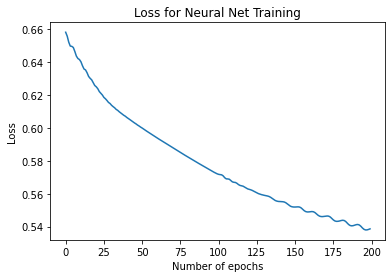

In [273]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [278]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")

In [279]:
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6733668341708543

In [281]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[499, 212],
       [243, 439]])

That makes sense. Both methods performed bad. The input vector has 768 dimensions which is very complex compared to previous examples and we don't use many comments. However, pyTorch is a bit better than keras.

**2b)** Which worked better (Keras or PyTorch)?



In [1]:
winner = 'PyTorch' #@param ['Select', 'PyTorch', 'Keras']

**3)** Create an alternative network that uses a different loss function using whichever package performed better on **2b**.

In [282]:
net = Network()

In [166]:
dir(F)

['BroadcastingList1',
 'BroadcastingList2',
 'BroadcastingList3',
 'Callable',
 'GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 'Optional',
 'Tensor',
 'Tuple',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_in_projection',
 '_in_projection_packed',
 '_infer_size',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_no_grad_embedding_renorm_',
 '_overload',
 '_pad',
 '_pad_circular',
 '_pair',
 '_scaled_dot_product_attention',
 '_single',
 '_threshold',
 '_triple',
 '_unpool_output_size',
 '_verify_batch_size',
 '_verify_spatial_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_max_pool1d',
 'adaptive_max_pool1d_with_indices',
 'adaptive_max_po

In [283]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = F.smooth_l1_loss

In [285]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

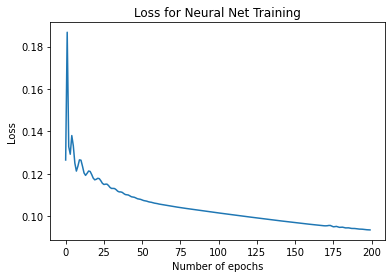

In [286]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [287]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6604450825556353

In [288]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[454, 257],
       [216, 466]])

**3b)** Which loss worked better?

In [306]:
bestloss = 'BCE is a bit better. However, the performance is similar.The training loss at the beginning is different. We can see oscillation pattern from the loss figure. ' #@param {type:"string"}

**4)** Create at least 3 alternative neural networks that use a different activation function for the hidden layers (e.g., GELU, tanh, swish) using whichever package performed better on **2b**.

In [190]:
# check available activation function
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'HuberLoss',
 'Identity',
 'InstanceNorm1d',
 'InstanceN

**GELU**

In [291]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(768, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define GELU activation and sigmoid output 
        self.gelu = nn.GELU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.gelu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [292]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [295]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

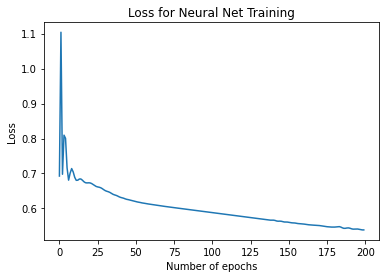

In [307]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [308]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6554199569274947

In [309]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[433, 278],
       [202, 480]])

**ELU**

In [310]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(768, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define ELU activation and sigmoid output 
        self.elu = nn.ELU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.elu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [311]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [312]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

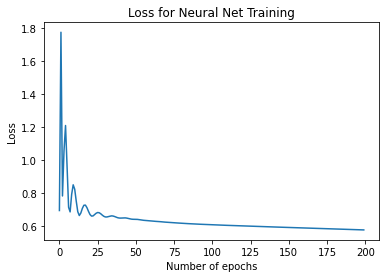

In [313]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [314]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6640344580043073

In [315]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[455, 256],
       [212, 470]])

**PReLU**

In [316]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(768, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define PReLu activation and sigmoid output 
        self.prelu = nn.PReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.prelu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [317]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [318]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

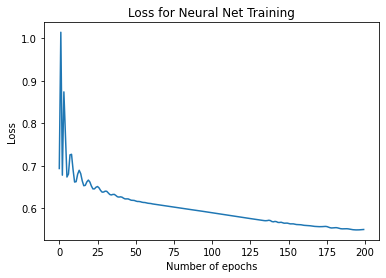

In [319]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [320]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.665470208183776

In [321]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[502, 209],
       [257, 425]])

**4b)** Which activation worked best and what is your hypothesis as to why?

In [322]:
bestactivation = "ReLU is the best of 'XeLU' family because of its simplicity. I specifically tested the performance of piecewise linear function family. And I found that all these ''XeLU\" have similar performance. This might suggest that differentiability is not a desirable attribution for activation functions. " #@param {type:"string"}

**5)** Create at least 3 *deeper* network models (between 4 and 20 layers), with more layers of whatever units performed best on **4b** (still using whatever package performed best on **2b**).  

I googled and found that there're rules of thumb that we should recude the number of neurons as we go deeper. So I will also test this rule.

**4 layers**

In [324]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden4 = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define relu activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [325]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [327]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:21<00:00,  9.15it/s]


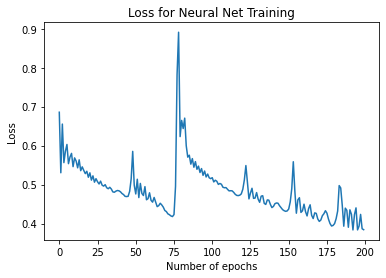

In [328]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [329]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6539842067480258

In [330]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[542, 169],
       [313, 369]])

**4 layers with decreasing neuron number**

In [404]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 100)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(100, 50)
        # hidden to hidden layer linear transformation
        self.hidden4 = nn.Linear(50, 25)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(25, 1)
        # Define relu activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [405]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [406]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:08<00:00, 22.38it/s]


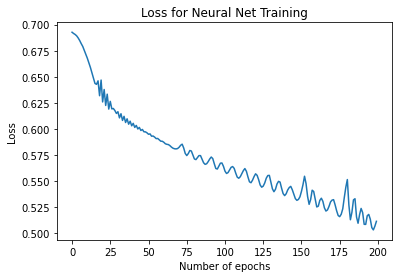

In [407]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [408]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6625987078248384

In [409]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[533, 178],
       [292, 390]])

**6 layers**

In [337]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden4 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden5 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden6 = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define relu activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.hidden5(x)
        x = self.relu(x)
        x = self.hidden6(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [338]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [339]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:29<00:00,  6.89it/s]


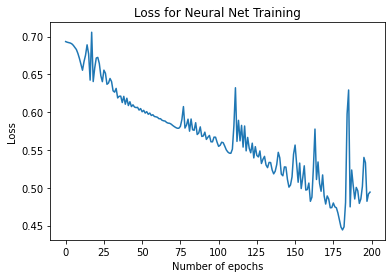

In [340]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [341]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6618808327351041

In [342]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[466, 245],
       [226, 456]])

**6 layers with decreasing neuron number**

In [343]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 100)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(100, 50)
        # hidden to hidden layer linear transformation
        self.hidden4 = nn.Linear(50, 25)
        # hidden to hidden layer linear transformation
        self.hidden5 = nn.Linear(25, 12)
        # hidden to hidden layer linear transformation
        self.hidden6 = nn.Linear(12, 6)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(6, 1)
        # Define relu activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.hidden5(x)
        x = self.relu(x)
        x = self.hidden6(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [344]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [345]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:10<00:00, 18.19it/s]


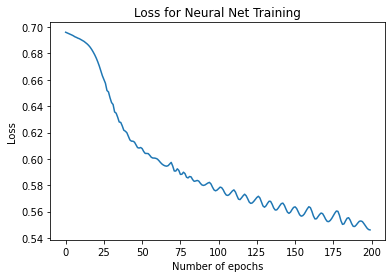

In [346]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [347]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6676238334529792

In [348]:
con_matrix = confusion_matrix(test_label_tensor, y_class_pt)
con_matrix

array([[487, 224],
       [239, 443]])

**8 layers**

In [349]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden4 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden5 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden6 = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        # hidden to hidden layer linear transformation
        self.hidden7 = nn.Linear(200, 200)
        # hidden to hidden layer linear transformation
        self.hidden8 = nn.Linear(200, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 1)
        # Define relu activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.hidden5(x)
        x = self.relu(x)
        x = self.hidden6(x)
        x = self.relu(x)
        x = self.hidden7(x)
        x = self.relu(x)
        x = self.hidden8(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [350]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [351]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:41<00:00,  4.87it/s]


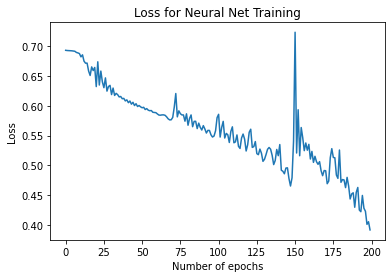

In [352]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [353]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6446518305814788

**8 layers with decreasing neuron number**

In [354]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 100)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(100, 50)
        # hidden to hidden layer linear transformation
        self.hidden4 = nn.Linear(50, 25)
        # hidden to hidden layer linear transformation
        self.hidden5 = nn.Linear(25, 12)
        # hidden to hidden layer linear transformation
        self.hidden6 = nn.Linear(12, 6)
        # hidden to hidden layer linear transformation
        self.hidden7 = nn.Linear(6, 3)
        # hidden to hidden layer linear transformation
        self.hidden8 = nn.Linear(3, 2)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(2, 1)
        # Define relu activation and sigmoid output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.hidden4(x)
        x = self.relu(x)
        x = self.hidden5(x)
        x = self.relu(x)
        x = self.hidden6(x)
        x = self.relu(x)
        x = self.hidden7(x)
        x = self.relu(x)
        x = self.hidden8(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x
net = Network()

In [355]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [356]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor.float())

100%|██████████| 200/200 [00:13<00:00, 15.10it/s]


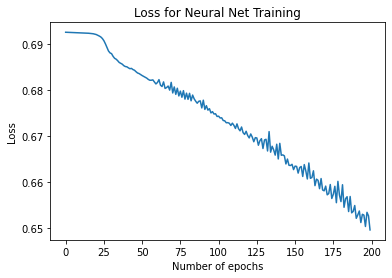

In [357]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [358]:
output = net(test_vect_tensor.float())
y_class_pt = (output.detach().numpy() > 0.5).astype("int32")
sklearn.metrics.accuracy_score(test_label_tensor, y_class_pt)

0.6403445800430725

**5b)** Which depth performed best?

In [ ]:
bestdepth =  4#@param {type:"number"}

We can find that although the performance(accuracy) of model doesn't change much if we decrease the number of neorons as layers go deep, training the model could be more stable and easier to guarantee convergence. 

**6)** Perform a regression task on your data using a final linear unit, OR a multi-classification task using the softmax unit. You can use Keras OR PyTorch.

In [411]:
train_vect = np.stack(train_comments['vect'])
train_label_multi = np.stack(train_comments['rating'].astype('int32')) -1 

test_vect = np.stack(test_comments['vect'])
test_label_multi = np.stack(test_comments['rating'].astype('int32')) -1 

In [412]:
train_vect_tensor = torch.tensor(train_vect)
train_label_tensor = torch.tensor(train_label_multi).type(torch.LongTensor)
# don't have to unsqueeze for multi-clasification 

In [413]:
test_vect_tensor = torch.tensor(test_vect)
test_label_tensor = torch.tensor(test_label_multi).type(torch.LongTensor)

In [414]:
train_label_tensor

tensor([3, 2, 1,  ..., 4, 4, 2])

In [415]:
test_label_tensor

tensor([3, 4, 2,  ..., 1, 1, 4])

In [416]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 100)
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(100, 25)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(25, 5)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

**nll_loss**

In [417]:
net = Network()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = criterion = F.nll_loss

In [418]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor)

100%|██████████| 200/200 [00:08<00:00, 24.89it/s]


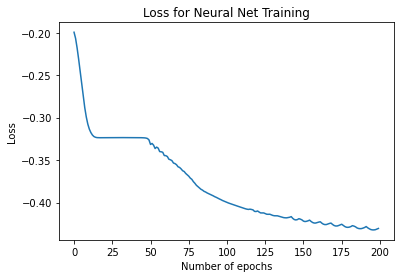

In [419]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [420]:
output = net(test_vect_tensor.float())
y_classes = output.argmax(axis=1)
sklearn.metrics.accuracy_score(test_label_multi, y_classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.38908829863603733

In [421]:
output

tensor([[2.1056e-10, 2.5296e-12, 2.3591e-03, 9.9764e-01, 6.1244e-10],
        [3.1570e-16, 1.5428e-21, 2.7437e-16, 1.0000e+00, 3.1475e-15],
        [2.9172e-10, 3.7667e-12, 2.2076e-03, 9.9779e-01, 8.5075e-10],
        ...,
        [8.1677e-12, 6.7011e-12, 9.9999e-01, 1.4856e-05, 1.5270e-11],
        [2.9814e-12, 4.1273e-12, 1.0000e+00, 8.9971e-07, 5.2152e-12],
        [1.7738e-16, 5.6373e-22, 5.0269e-17, 1.0000e+00, 2.0305e-15]],
       grad_fn=<SoftmaxBackward0>)

In [422]:
con_matrix = confusion_matrix(test_label_multi, y_classes)
con_matrix

array([[  0,   0,  69,  27,   0],
       [  0,   0, 119,  53,   0],
       [  0,   0, 258, 185,   0],
       [  0,   0, 157, 284,   0],
       [  0,   0,  76, 165,   0]])

**CrossEntropyLoss**

In [423]:
net = Network()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.CrossEntropyLoss()

In [424]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor)

100%|██████████| 200/200 [00:08<00:00, 24.37it/s]


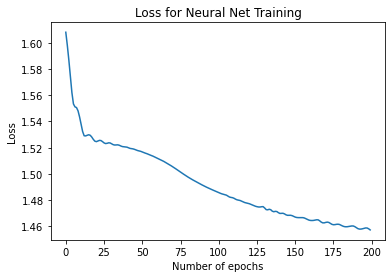

In [425]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [426]:
output = net(test_vect_tensor.float())
y_classes = output.argmax(axis=1)
sklearn.metrics.accuracy_score(test_label_multi, y_classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.38047379755922467

In [427]:
output

tensor([[1.3966e-07, 5.4196e-06, 1.9795e-01, 8.0196e-01, 8.0112e-05],
        [1.1140e-09, 5.4152e-09, 4.5673e-05, 9.9995e-01, 1.3554e-07],
        [1.1244e-07, 2.9239e-06, 6.0183e-02, 9.3977e-01, 4.7236e-05],
        ...,
        [8.2555e-08, 1.0726e-05, 9.8817e-01, 1.1719e-02, 9.9019e-05],
        [1.1812e-07, 1.4269e-05, 9.8962e-01, 1.0248e-02, 1.2218e-04],
        [1.1400e-09, 4.6764e-09, 3.3538e-05, 9.9997e-01, 1.0833e-07]],
       grad_fn=<SoftmaxBackward0>)

In [428]:
con_matrix = confusion_matrix(test_label_multi, y_classes)
con_matrix

array([[  0,   0,  71,  25,   0],
       [  0,   0, 115,  57,   0],
       [  0,   0, 239, 204,   0],
       [  0,   0, 150, 291,   0],
       [  0,   0,  53, 188,   0]])


**6b)** Briefly explain what you are predicting, why, and your interpretation of your results.

In [429]:
complexpredict = "I am predicting the rating of movie comments. The model learned cheating anyway. I used nll_loss at first, the model predicted all rating as 3 or 4. Then I used another similar loos function. It performed similar. The model made effort to predict  ratings as 3. A big reason why the model learned cheating is because the input is complex yet the model is very simple, it can't find better way to reduce loss.   " #@param {type:"string"}

**7)** Use the Captum library on your model (6 above) and use it to discover the relative importance of input features for the ultimate prediction, and the combination of those features in higher-order features (e.g., neurons) within the model.

Since  the model I get from task 6 has very bad performance, here I re-trained the model using 0/1 label, where 0 represents rating 1.0, 2.0, and 3.0, and 1 represents 4.0 and 5.0. 

In [455]:
train_vect = np.stack(train_comments['vect'])
train_label_multi = np.stack(train_comments['label'])

test_vect = np.stack(test_comments['vect'])
test_label_multi = np.stack(test_comments['label']) 

In [456]:
train_vect_tensor = torch.tensor(train_vect)
train_label_tensor = torch.tensor(train_label_multi).type(torch.LongTensor)
# don't have to unsqueeze for multi-clasification 

In [457]:
test_vect_tensor = torch.tensor(test_vect)
test_label_tensor = torch.tensor(test_label_multi).type(torch.LongTensor)

In [466]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(768, 200)
        self.relu1 = nn.ReLU()
        # hidden to hidden layer linear transformation
        self.hidden2 = nn.Linear(200, 50)
        self.relu2 = nn.ReLU()
        # hidden to hidden layer linear transformation
        self.hidden3 = nn.Linear(50, 10)
        self.relu3 = nn.ReLU()
        # Output layer, 1 output for the classification
        self.output = nn.Linear(10, 2)
        # Define sigmoid activation and softmax output 
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        lin1_out = self.hidden1(x)
        relu_out1 = self.relu1(lin1_out)
        lin2_out = self.hidden2(relu_out1)
        relu_out2 = self.relu2(lin2_out)
        lin3_out = self.hidden3(relu_out2)
        relu_out3 = self.relu3(lin3_out)
        lin4_out = self.output(relu_out3)
        return self.softmax(lin4_out) 

In [467]:
net = Network()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = criterion = F.nll_loss

In [468]:
e_losses = []
num_epochs = 200
for e in tqdm(range(num_epochs)):
    e_losses += train_epoch(net, opt, criterion, train_vect_tensor.float(), train_label_tensor)

100%|██████████| 200/200 [00:07<00:00, 28.44it/s]


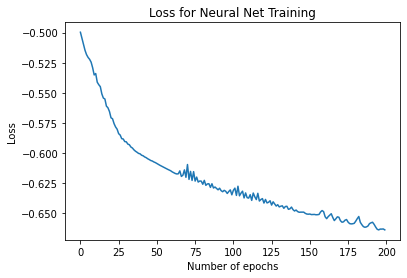

In [469]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

In [470]:
output = net(test_vect_tensor.float())
y_classes = output.argmax(axis=1)
sklearn.metrics.accuracy_score(test_label_multi, y_classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.6661880832735104

In [471]:
test_input_tensor = test_vect_tensor.float()
ig = IntegratedGradients(net)
test_input_tensor.requires_grad_()
attr, delta = ig.attribute(test_input_tensor,target=1, return_convergence_delta=True)
attr = attr.detach().numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [472]:
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    # for i in range(len(feature_names)):
        # print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)

Since it's high-dimensional compact vector representation, these features don't have names.

Average Feature Importances


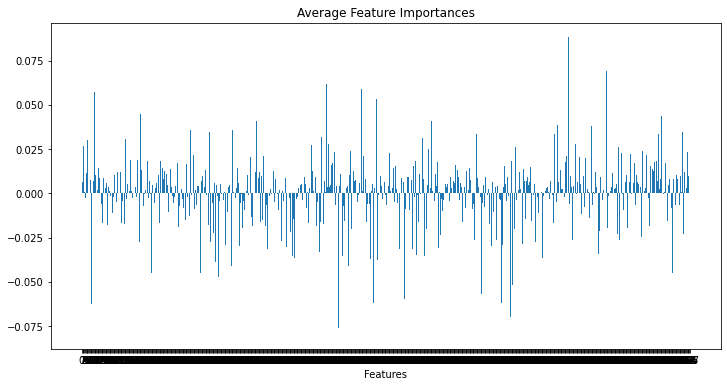

In [473]:
feature_names = list(range(768))
visualize_importances(feature_names, np.mean(attr, axis=0))

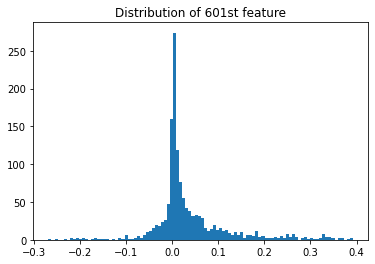

In [474]:
plt.hist(attr[:,600], 100);
plt.title("Distribution of 601st feature");

So this feature's importance distribution is centered around 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average Neuron Importances


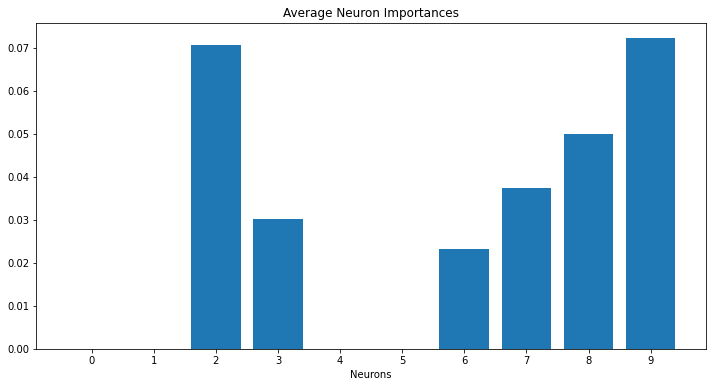

In [475]:
cond = LayerConductance(net, net.relu3)

cond_vals = cond.attribute(test_input_tensor,target=1)
cond_vals = cond_vals.detach().numpy()

visualize_importances(range(10),np.mean(cond_vals, axis=0),title="Average Neuron Importances", axis_title="Neurons")

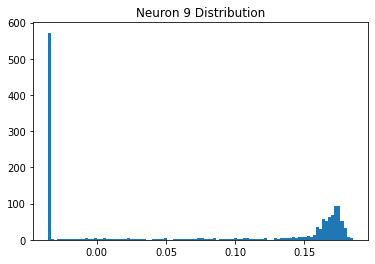

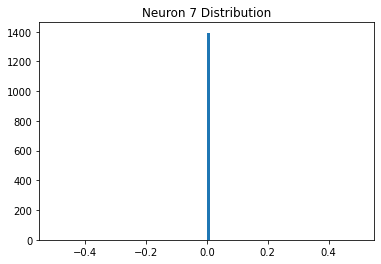

In [477]:
plt.hist(cond_vals[:,9], 100);
plt.title("Neuron 9 Distribution")
plt.figure()
plt.hist(cond_vals[:,5], 100);
plt.title("Neuron 7 Distribution");

Neuron 7 didn't learn any features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average Feature Importances for Neuron 9


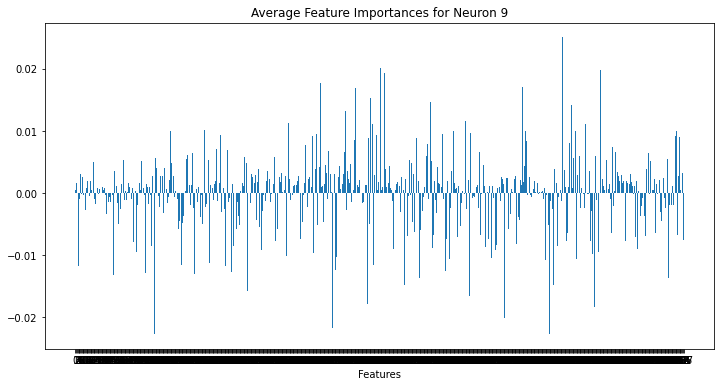

In [478]:
neuron_cond = NeuronConductance(net, net.relu3)
neuron_cond_vals_9 = neuron_cond.attribute(test_input_tensor, neuron_selector=9, target=1)

visualize_importances(feature_names, neuron_cond_vals_9.mean(dim=0).detach().numpy(), title="Average Feature Importances for Neuron 9")

In [486]:
#@markdown **7b)** Briefly explain your interpretation of what matters and why based on your Attribution results.
complexpredict = "Since there're so many features, it's not very useful to interpret. But it could be very useful when different parts input have real meanings. I am thinking that does it help the processing of dropping some redundant neurons?  " #@param {type:"string"}

## ***Hint***
Here is a reasonably sized dataset that we load for you using pandas. You can use it for this homework, or follow the steps to load your own for use in the machine learning tasks above.

Note that if using PyTorch you will be converting the values to Tensors.

You can get the dataset by the link:

https://drive.google.com/file/d/1XQrT4mAeOb79tmkNFFiPFIU4-N9JH7px/view?usp=sharing

The dataset comes from Kaggle:

https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

In [ ]:
import pandas as pd

In [ ]:
bankruptcy_df = pd.read_csv(path_to_file)

In [ ]:
#@markdown How many hours did it take you to complete this homework?
hours =  8#@param {type:"number"}

I encountered a bug, and I spent a lot of time debugging. When I was predicting the model, I found that all my models have the same performance: the accuracy score on test set is a constant number! I spent a lot of time testing the code and trying to find out what's wrong. 

`Code error report`: The bug is caused by this errror when I copied the sample codes in `keras Deep Net` Section: 

In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=1)
sklearn.metrics.accuracy_score(y_test, y_predict)

This is incorrect. This model uses sigmoid, the output has only one possibility value. So, if we use argmax, it would 'predict' all results as 0. 

In [ ]:
#@markdown How hard was this homework?
too_easy_too_hard = 6 #@param {type:"slider", min:0, max:10, step:0.1}